Hans Hwang and Jenniber Franco

## <center>CS341 Project 1 (due Thursday September, 10, 2020)</center>

## Part 1. Units and Degradation

To model the degradation of protein $P1$, we use the following ODE 

(∗) $\frac{d}{dt}P1(t) = -d1\cdot P1(t)$
 
where $P1$ has units of nM and $t$ has units of seconds (s).

<hr style="border:2px solid gray"> </hr>

(1) What units must d1 have? Show your work.

if P1(t) is in nM, and d/dt (P1(t)) is the dx/dt, which is nM/s, then we solve for d1's units, which is 1/s, or s^-1

<hr style="border:2px solid gray"> </hr>

This is a linear differential equation, which has an analytic solution 

(†) $P1(t) = e^{-d1\cdot t}\cdot P1_0$

where the initial condition is $P1(0) = P1_0$.

We can confirm that it is a solution by differentiating both sides of (†):

$\frac{d}{dt}(P1(t)) = \frac{d}{dt}(e^{-d1\cdot t}\cdot P1_0) $

And since the $e^t$ is isn't own derivative, we have

$\frac{d}{dt}(P1(t)) = -d1\cdot e^{-d1\cdot t}\cdot P1_0 $

and substituting the definition of $P1(t)$

$\frac{d}{dt}(P1(t)) = -dt\cdot P1(t)$

(2) Using initial condition $P1(0) = 2 nM$ and kinetic parameter $d1=2 s^{-1}$, simulate the system from time $t=0s$ to $t=10$s with a time step of $0.01$s. (Use sciyp.integrate.solve_ivp.)

Plot the simulation result along with the analytic result on the same graph. Be sure to label your axes and to supply a legend. (use matplotlib.pyplot's plot command).

Next, demonstrate that the slope of the solution really is $-d1 P1(t)$ by selecting several points on the solution curve and drawing a short line with slope $-d1 P1(t)$ centered at $P1(t)$. We expect these lines to be tangent lines, if the solution is correct.

Finally, add a new Markdown cell to act as a caption for the figure. It should describe the content of the figure (i.e. it should include that one line is the numerical solution to a simulation, one is the analytic solution, and that there are short lines computed using the RHS of the ODE). It should also explain any conclusions we should draw from this figure. In this case, explain why these short lines demonstrate the curve is the solution.

(1000,)


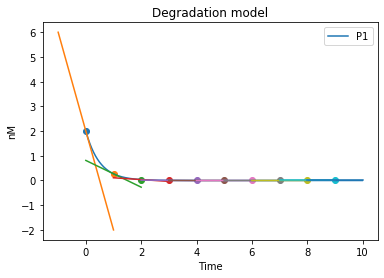

In [61]:
# Write code here
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
def ode_model(t, y, params):
    k = params[0]
    
    P1 = y[0]
    dydt = np.zeros((1,))
    dydt[0] = -k * P1
    
    return dydt

ode = lambda t,y: ode_model(t,y,params)#lambda function needed to run

params = (2,) #kinetic parameter d1
sol = scipy.integrate.solve_ivp(fun=ode, t_span=(0,10), y0=(2,), t_eval=np.arange(0,10,.01) )

plt.plot(sol.t, sol.y.T)
plt.title("Degradation model")
plt.xlabel("Time")
plt.ylabel("nM")

print(sol.t.shape)

tList = np.arange(0,10,1)
solList = 2*np.exp(-2*tList)
#print(solList)
slopesList = -4 * np.exp(-2*tList)
# print("****" ,slopesList)

for i in range(len(tList)):
    #print(tList[i] + slopesList[i])
    plt.plot([tList[i]-1, tList[i] + 1],[solList[i] - slopesList[i], solList[i] + slopesList[i]])
    plt.scatter(tList[i],solList[i])
    #plt.plot([tList[i]  - solList[i] * 2, tList[i+1] - solList[i] * 2],[solList[i] + solList[i] * 2, solList[i+1] - solList[i] * 2])
plt.legend(["P1"])

The degradation model has a line P1 that is the numerical solution to the simulation, and the tangent lines to the numerical solution line represents the analytical solution. The short lines demonstrate that the numerical curve is a solution, because they are calculated using the analyical solution and tangent the numerical solution. We also have the individual points at which we took the tangent at dotted as a scatter plot.

<hr style="border:2px solid gray"> </hr>

(3) The half-life of a protein is the amount of time it takes for the concentration
to halve. What is the half-life of protein P1 (in terms of d1)? Show your work.

Because at the initial value, P1(0) = 2, the half life will be where P1(t) is equal to 1, so we can plug that into the analytical solution (†) $P1(t) = e^{-d1\cdot t}\cdot P1_0$
and so we get $1 = e^{-2\cdot t}\cdot 2$

=$0.5 = e^{-2\cdot t}$


=$ln(0.5) = ln(e^{-2\cdot t})$

=$ln(0.5) = -2\cdot t$

$t = ln(0.5)  / -2$

$t = 0.34657359028$

<hr style="border:2px solid gray"> </hr>

(4) Demonstrate that your calculation of the half-life is correct by re-plotting the numerical solution from above and plotting a vertical line at the half-life and a horizontal line at $P1(0)/2$. Add a new Markdown cell below the figure to describe what it contains and why it shows your calculation is correct.

Text(0, 0.5, 'nM')

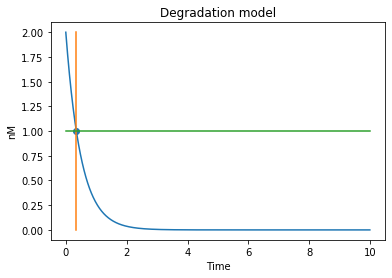

In [2]:
# Write code here
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
def ode_model(t, y, params):
    k = params[0]
    
    P1 = y[0]
    dydt = np.zeros((1,))
    dydt[0] = -k * P1
    
    return dydt

ode = lambda t,y: ode_model(t,y,params)#lambda function needed to run

params = (2,) #kinetic parameter d1
sol = scipy.integrate.solve_ivp(fun=ode, t_span=(0,10), y0=(2,), t_eval=np.arange(0,10,.01) )

plt.plot(sol.t, sol.y.T)
plt.plot([0.34657359028, 0.34657359028], [2, 0])# vertical line at half life
plt.plot([0,10], [1,1]) #horizontal line at P1(0) / 2, where P1(0) is 2, so the horizontal line comes at 1
plt.scatter(0.34657359028, 1)

plt.title("Degradation model")
plt.xlabel("Time")
plt.ylabel("nM")

The calculation is correct because the half life of our P1(0) (which is 2) is one, so our nM would be 1.0. It is graphed against the 0.34657359028 that we calculated, and because the lines intersect on the numerical curve, our calculation of half life is correct.

## Part 2. Dimerization

Consider a system in which two proteins can bind to form a dimer, and unbind to
unform the dimer.

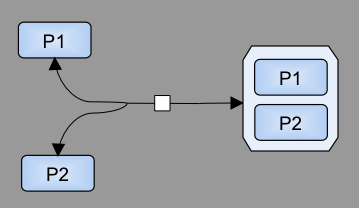

Proteins P1 and P2 can bind to form a dimer and the dimer can unbind to release P1 and P2. In addtion, P1, P2, and the dimer are degraded.

For each process (indicated by the white square), we write the corresponding reaction. Since we are using mass action kinetics, we know that the mathematical expression for each reaction is dependent on the substrates and a kinetic rate constant. To be as informative as possible, we include in our reactions the kinetic rate constant associated with each reaction, i.e. 

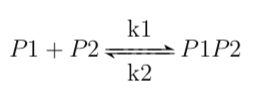

where $k1$ is the rate constant for binding and $k2$ is the rate constant for unbinding.


<hr style="border:2px solid gray"> </hr>

(1) Write down the set of ODEs that describe the dynamics of this system.

$\frac{d[P1]}{dt} = -k1[P1][P2] + k2[P1P2]$

$\frac{d[P2]}{dt} = -k1[P1][P2] + k2[P1P2]$

$\frac{d[P1P2]}{dt} = k1[P1][P2] - k2[P1P2]$

These are the sets of ODEs that describe the dynamics of a noraml dimerization with a reverse dimerization.

<hr style="border:2px solid gray"> </hr>

(2) Using initial conditions $P1(0) = 2 nM$, $P2(0) = 3 nM$, and $P1P2(0) = 1 nM$ and kinetic parameters $k1= 1nM^{-1}s^{-1}$ and $k2=2 s^{-1}$, simulate the system from time $t=0s$ to $t=10s$ with a time step of $0.01s$.

Plot the results, being sure to label your axes and to supply a legend. Add a new Markdown cell below the figure to describe what it contains and why the basic trajectories of the curves makes sense, given the ODEs.

In [2]:
# Write code here
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
P1_0 = 2
P2_0 = 3
P1P2_0 = 1

def reverse_dimer(t, y, params):
    k1 = params[0]
    k2 = params[1]
    
    P1 = y[0];
    P2 = y[1]
    P1P2 = y[2]
    
    dydt = np.zeros( (3,) )
    dydt[0] = -k1*P1*P2 + k2*P1P2 
    dydt[1] = -k1*P1*P2 + k2*P1P2 
    dydt[2] = k1*P1*P2 - k2*P1P2 
    
    return dydt

params = (1,2)
rd = lambda t,y : reverse_dimer(t, y, params)
sol = scipy.integrate.solve_ivp( fun=rd, t_span=(0,10), y0=(P1_0,P2_0,P1P2_0),
                               t_eval=np.arange(0,10,.01))

plt.plot(sol.t, sol.y.T)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend( ["P1", "P2", "P1P2"] )
plt.title("Reverse Dimerization")

Text(0.5, 1.0, 'Reverse Dimerization')

P1P2 represents the product, which goes up as the P1 and P2 are consumed, reaching an equilibrium or "steady-state", because the rates become 0. In visual chemical reactions, this is when the fizziness stops (mentos and coke).

<hr style="border:2px solid gray"> </hr>

(3) Steady-state is achieved when the rates are at zero. What is the steady-state for this system? Explain the relationships between the steady-states of $P1$, $P2$, and $P1P2$. Why are they in such a relationship? (i.e. relate the parameters to the steady-states)

The steady state for P1 is around ~1.4, ~2.45 for P2, and ~1.6 for P1P2. The parameters are $k1= 1nM^{-1}s^{-1}$ and $k2=2 s^{-1}$, and everything seems to move around by 1/2, so there is a correlation there.

<hr style="border:2px solid gray"> </hr>

(4) Re-run the simulation with $k1=1nM^{-1}s^{-1}$ and $k2=1s^{-1}$ and plot the results. Add a new Markdown cell below the figure to describe what it contains.

Text(0.5, 1.0, 'Reverse Dimerization')

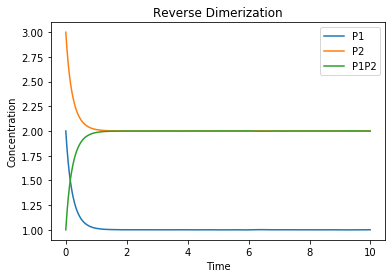

In [3]:
# Write code here.
params = (1,1)
rd = lambda t,y : reverse_dimer(t, y, params)
sol = scipy.integrate.solve_ivp( fun=rd, t_span=(0,10), y0=(P1_0,P2_0,P1P2_0),
                               t_eval=np.arange(0,10,.01))
plt.plot(sol.t,sol.y.T)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend( ["P1", "P2", "P1P2"] )
plt.title("Reverse Dimerization")

The graph above shows P1 getting smaller (being consumed), as well as P2, with a decrease of around 1 nM. The P1P2 does the opposite of P1 and P2 by increasing the same amount (1 nM). The parameters are 1 and 1, so they move around by 1/1 nM. This graph shows the same thing as the previous graph, with different parameters.

<hr style="border:2px solid gray"> </hr>

(5) The rate constants for binding and unbinding are identical. But this does not mean that the system begins in steady-state. Why not?

They reach equilibrium or steady-state when the concentration of P1P2 reaches the concentration of P2. This is because when they are equal, they are both binding and unbinding at the same rate.

<hr style="border:2px solid gray"> </hr>

(6) Explain what has changed in the relationship between the steady-states of the molecular concentrations. Why have those changes occurred?

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible. You could demonstrate the calculation for extreme values of k1 and k2, produce annotated figures, and demonstrate the relationship between simulation output and calculations you perform.*

Text(0.5, 1.0, 'Reverse Dimerization')

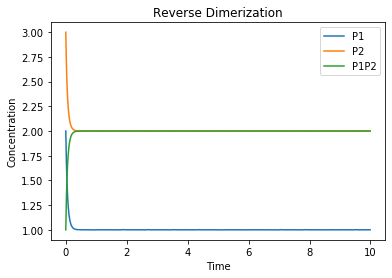

In [8]:
params = (4,4)
rd = lambda t,y : reverse_dimer(t, y, params)
sol = scipy.integrate.solve_ivp( fun=rd, t_span=(0,10), y0=(P1_0,P2_0,P1P2_0),
                               t_eval=np.arange(0,10,.01))
plt.plot(sol.t,sol.y.T)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend( ["P1", "P2", "P1P2"] )
plt.title("Reverse Dimerization")

Here we changed the parameters for unbinding and binding up to 4 and 4, so that they are still even, but different than 1 and 1. P1P2 still meets up with P2 at a concentration level of 2, but the scalar of 4 for each parameter seems to increase the rate

The steady states changed from being P1P2 leveling out at 1.6 to P1P2 leveling out at 2, alongside P2, because the parameters for binding and unbinding switched from 1 and 2 to 1 and 1.

# Part 3. Dimerization with Degradation

We add to our system the process of degradation.

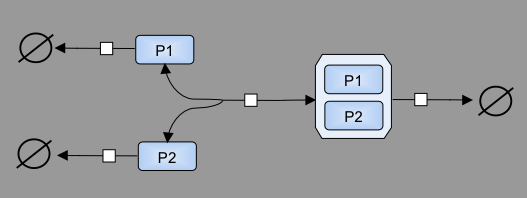

Proteins P1 and P2 can bind to form a dimer and the dimer can unbind to release P1 and P2. In addtion, P1, P2, and the dimer are degraded.

For each process (indicated by the white square), we write the corresponding reaction (including rate constants), i.e. 

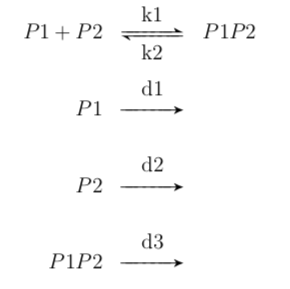

<hr style="border:2px solid gray"> </hr>

(1) Write down the set of ODEs that describe the dynamics of this system.

*Remove this line and use this cell for your solution.*

<hr style="border:2px solid gray"> </hr>

(2) Using initial conditions $P1(0) = 2 nM$, $P2(0) = 3 nM$, and $P1P2(0) = 1 nM$ and kinetic parameters $k1= 1nM^{-1}s^{-1}$, $k2=2 s^{-1}$ and $d1=d2=d3=1 s^{-1}$, simulate the system from time $t=0s$ to $t=10s$ with a time step of $0.01s$.

Plot the results, being sure to label your axes and to supply a legend.

In [6]:
# Write code here.

<hr style="border:2px solid gray"> </hr>

(3) Describe the interesting features of the data. For example, is there a steady-state? If so, what is it and why did the system approach it? Are there any peaks? If so, why are they there?

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

*Remove this line and use this cell for your solution.*

<hr style="border:2px solid gray"> </hr>

(4) Find a set of parameter values (all $\ge10^{-12}$) for which the dimer's apparent steady-state concentration is higher than the steady-states of $P1$ and $P2$. What intuition did you use to find these values?

Note: By "apparent steady-state", I mean the value that $P1P2$ seems to remain at during the time-period of the simulation (i.e. its value from say 5s to 10s). Given that degradation is included in the model, the steady-state as time goes to infinity will always be zero for all three proteins.  But I am interested in the behavior on the timescale of seconds -- not years. 

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

*Remove this line and use this cell for your solution.*

<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*